Heart Disease Prediction Using Various Machine Learning Techniques.

We would be working with the heart disease prediction data that is found in UCI repository. Below is an actual link of the data that we would be working. We would be exploring various machine learning techniques that could be used for predictions and gain a good understanding of them by taking into consideration some of the important metrics such as accuracy, precision and recall. There are other metrics that are also present and are important that we would be exploring and which could be seen at the end of the project.

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix, classification_report
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

Reading the data

In [2]:
data = pd.read_csv("E:\\VIT-AP\\FALL SEM 24-25\\Capstone project\\dataset\\heart.csv")

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
if 'sex' in data.columns:
    label_encoder = LabelEncoder()
    data['sex'] = label_encoder.fit_transform(data['sex'])


Getting the information

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


Understanding how the data is spread

In [7]:
data.describe().T      

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
exang,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


Countplot for output variable 'Target'

<Axes: xlabel='target', ylabel='count'>

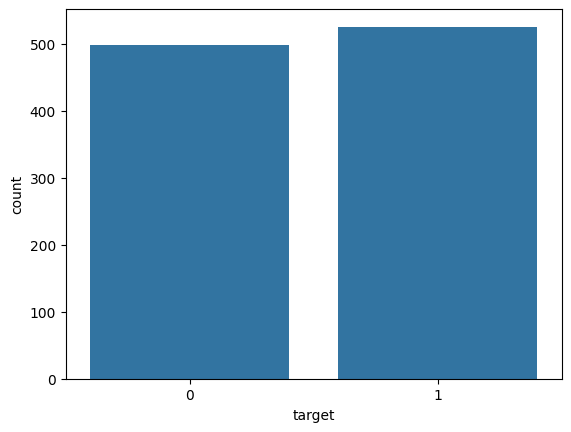

In [8]:
sns.countplot(data = data, x = 'target')

<Axes: xlabel='sex', ylabel='count'>

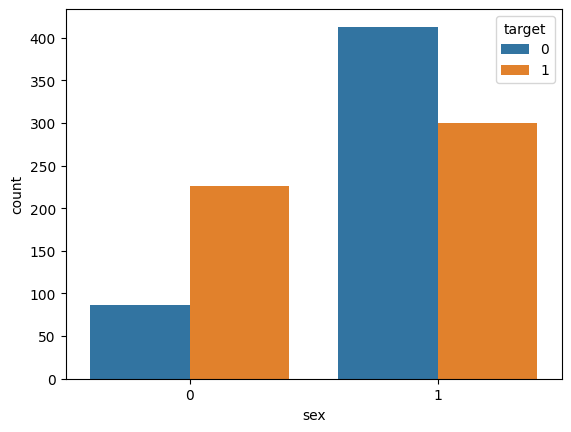

In [9]:

sns.countplot(data = data, x = 'sex', hue = 'target')

C:\Users\prana\AppData\Local\Temp\ipykernel_11164\3216385570.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


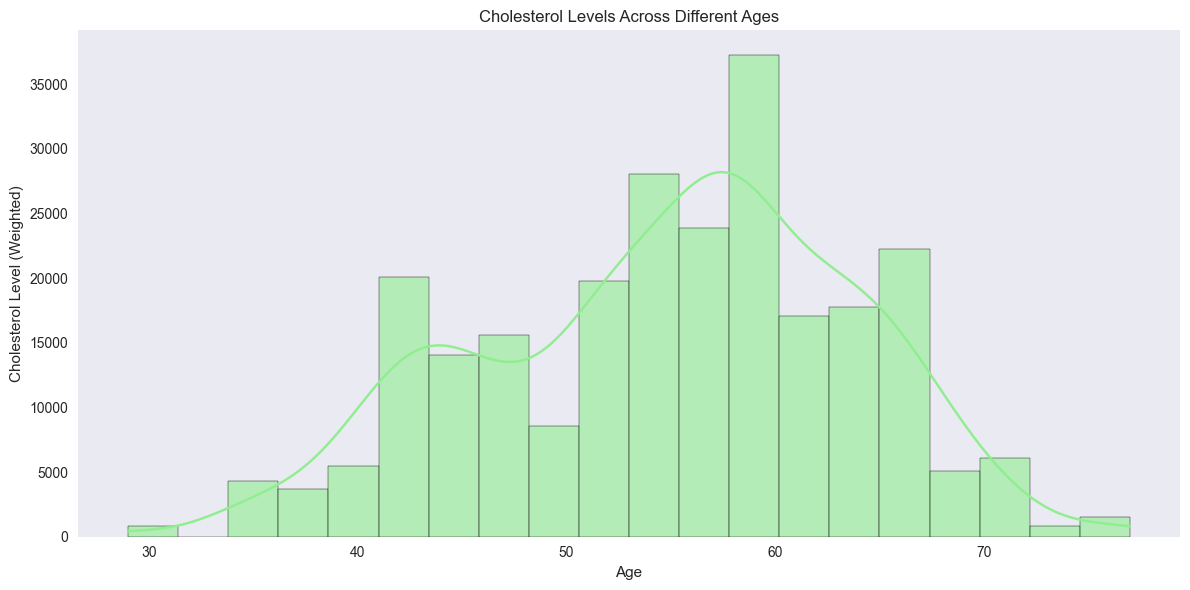

In [10]:
# Set up the plot style
plt.style.use('seaborn')
plt.figure(figsize=(12, 6))

# Create a histogram of cholesterol levels with age on the x-axis
sns.histplot(data=data, x='age', weights='chol', bins=20, kde=True, color='lightgreen', alpha=0.6)

# Customize the plot
plt.title('Cholesterol Levels Across Different Ages')
plt.xlabel('Age')
plt.ylabel('Cholesterol Level (Weighted)')
plt.grid()

# Show the plot
plt.tight_layout()
plt.show()

Heatmap to understand correlation

<Axes: >

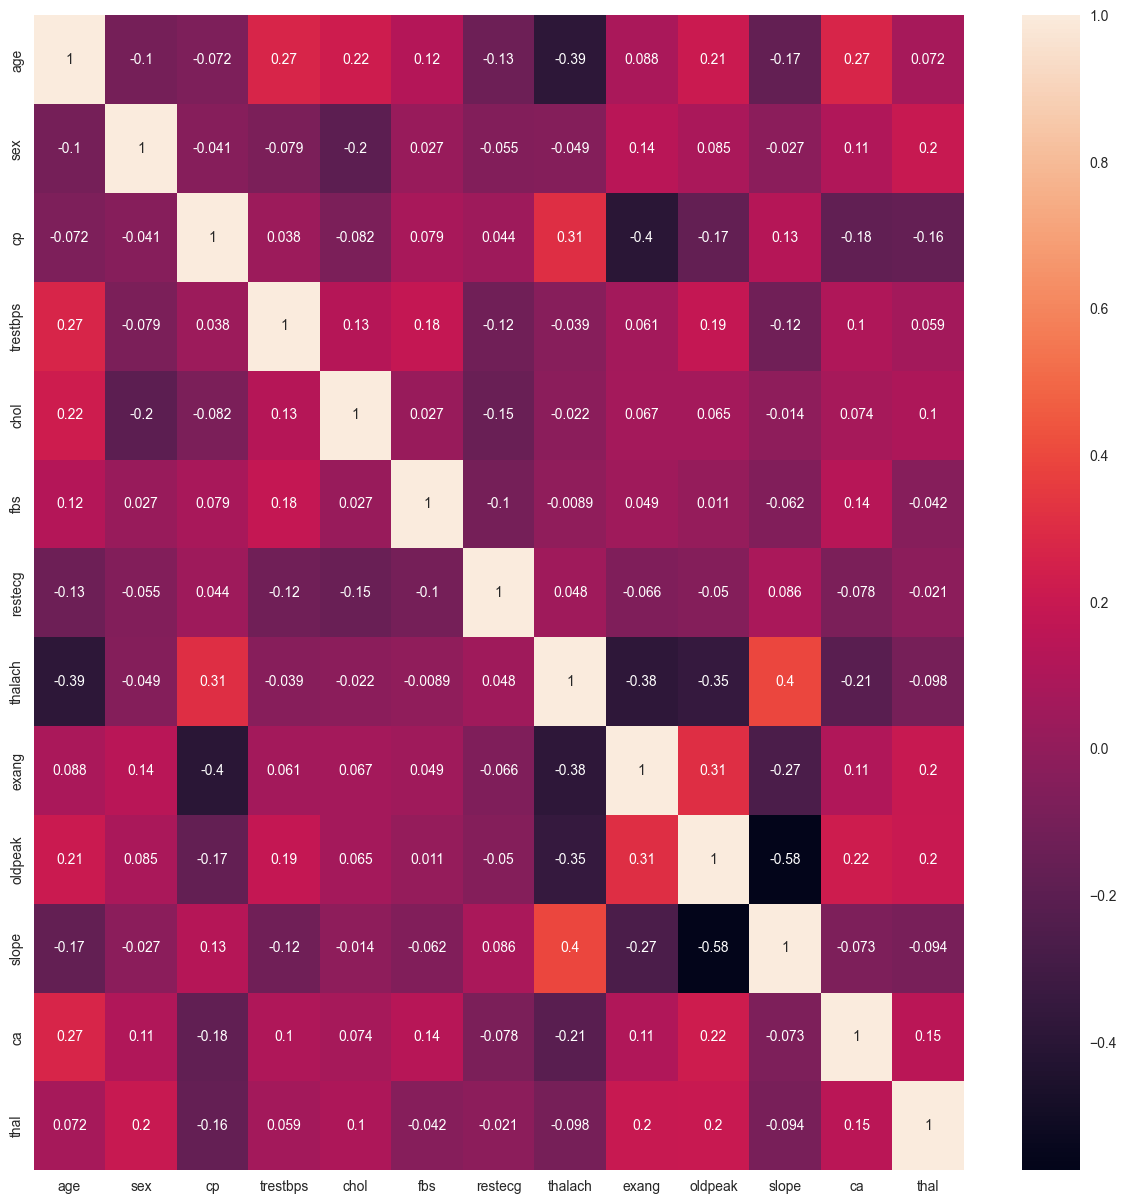

In [11]:
plt.figure(figsize = (15, 15))
sns.heatmap(data.drop(['target'], axis = 1).corr(), annot = True)


Regression plot for features

<Axes: xlabel='age', ylabel='thalach'>

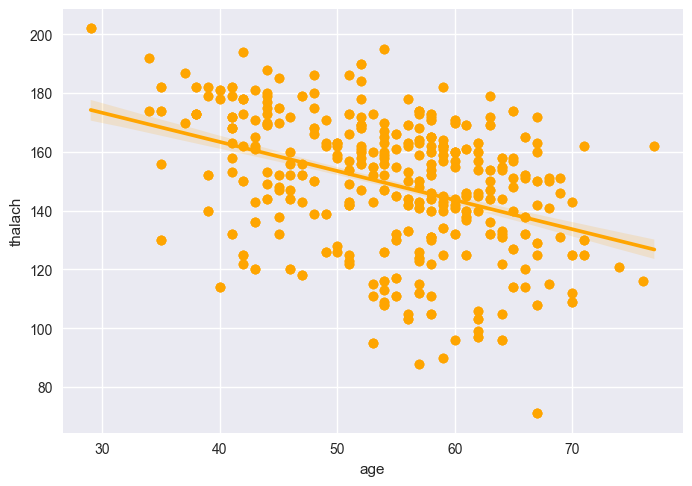

In [12]:
sns.regplot(x = 'age', y ='thalach', data = data, color = 'orange')

In [13]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


Pairplot for the data points

C:\Users\prana\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


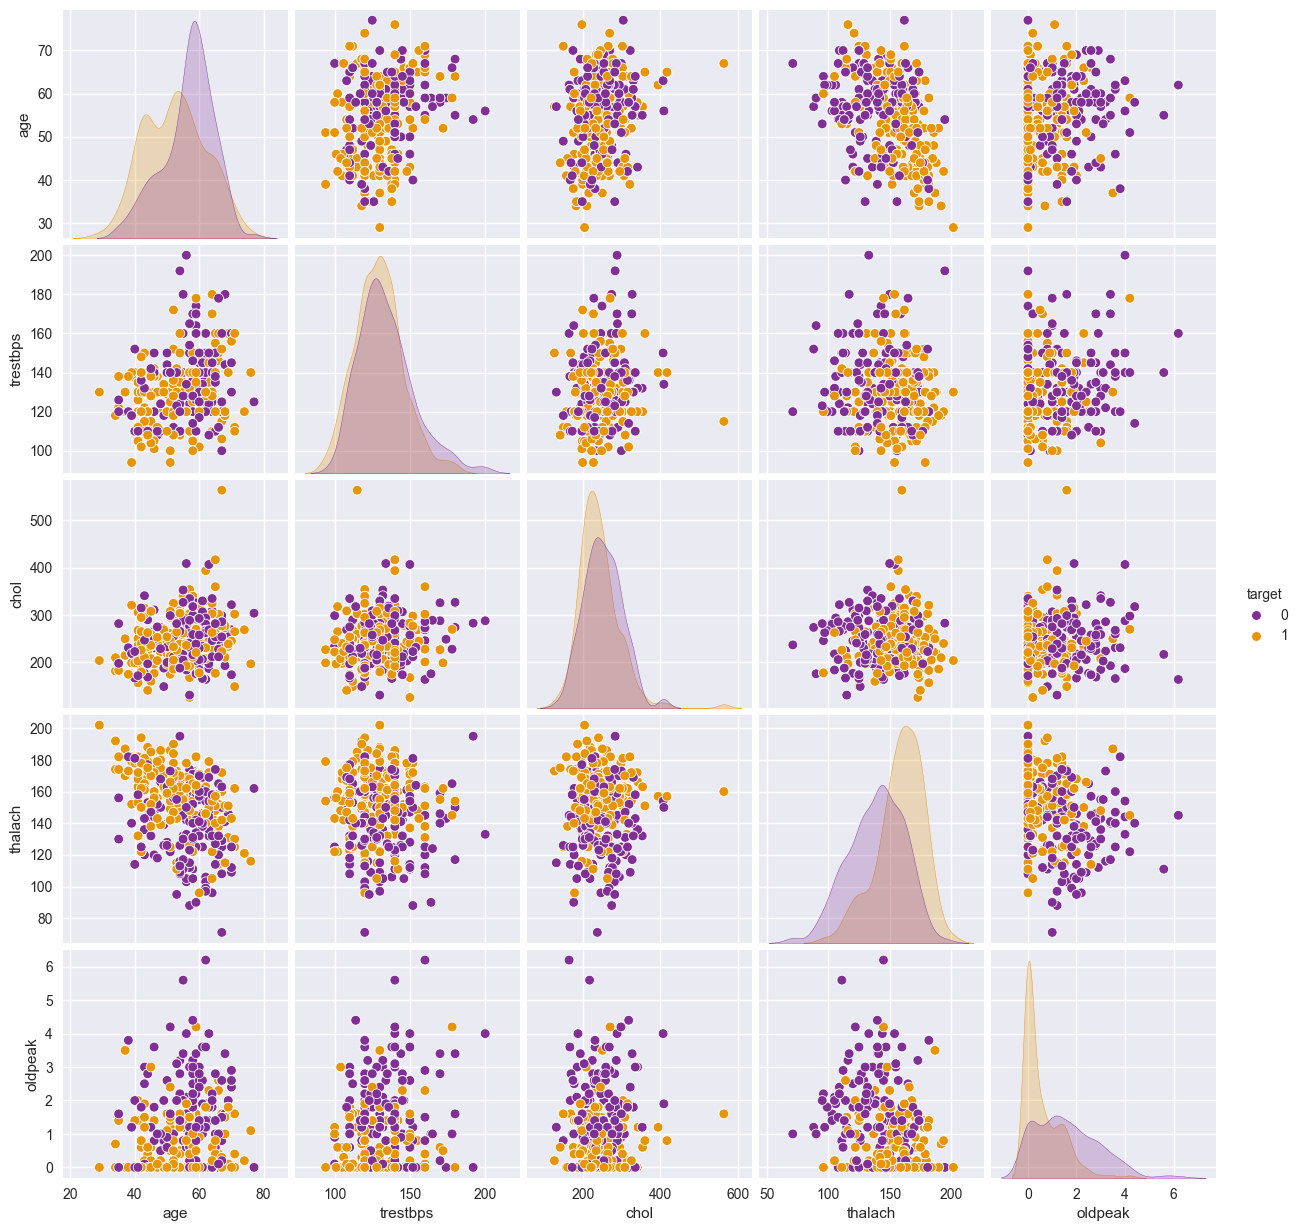

In [14]:
sns.pairplot(data[['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target']], hue = 'target', palette = 'CMRmap')


Regression plot for features

<Axes: xlabel='age', ylabel='chol'>

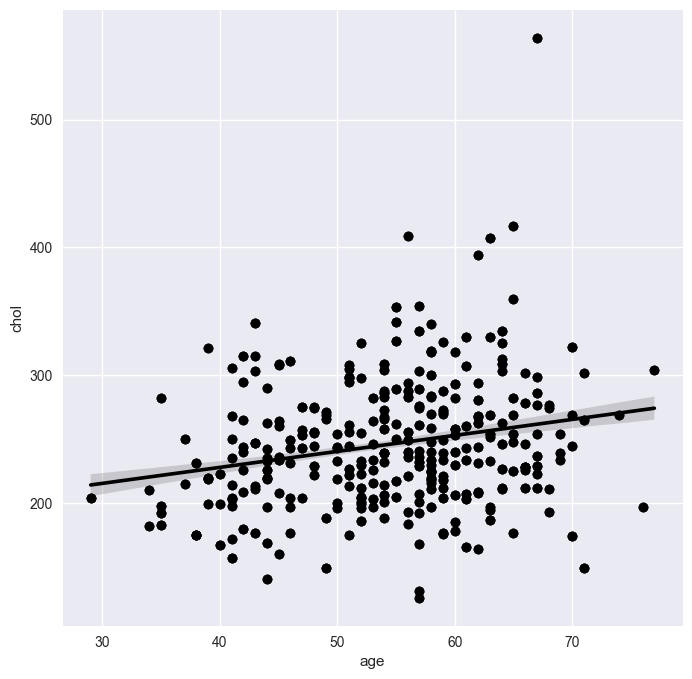

In [15]:
plt.figure(figsize = (8, 8))
sns.regplot(data = data, x = 'age', y = 'chol', color = 'black')


Boxplot for feature 'Cholestrol'

<Axes: xlabel='chol'>

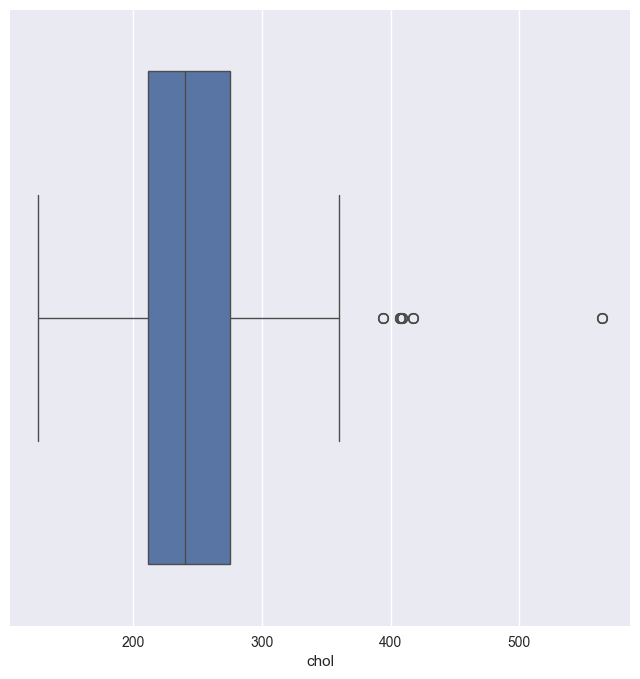

In [16]:

plt.figure(figsize = (8, 8))
sns.boxplot(data = data, x = 'chol')

<Axes: xlabel='trestbps'>

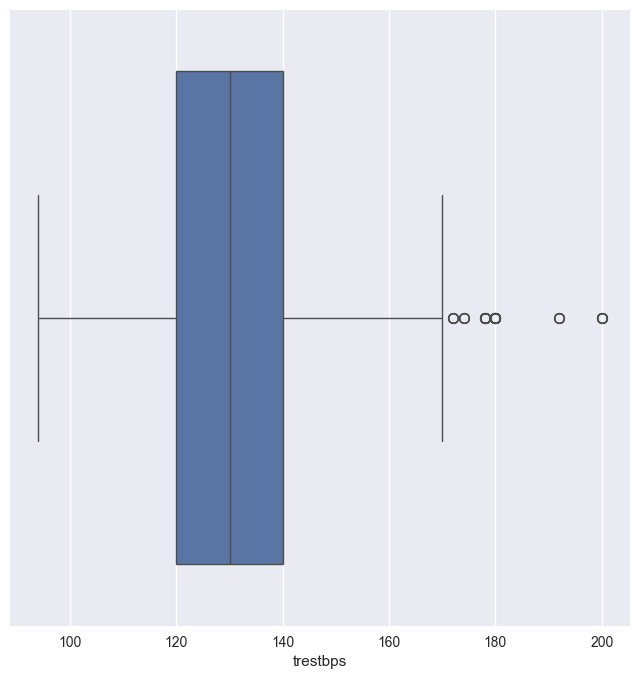

In [17]:
plt.figure(figsize = (8, 8))
sns.boxplot(data = data, x = 'trestbps')

Boxplot for feature 'Thalach'

<Axes: xlabel='thalach'>

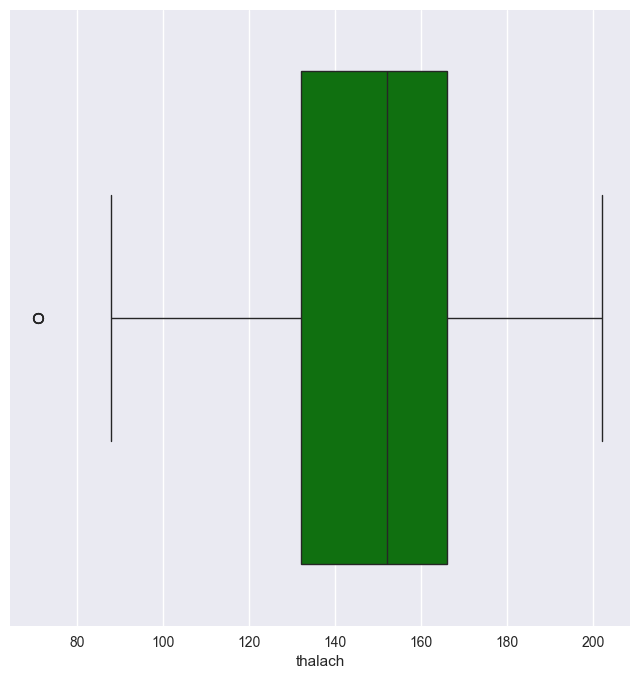

In [18]:

plt.figure(figsize = (8, 8))
sns.boxplot(data = data, x = 'thalach', color = 'green')


Boxplot for feature 'Age'

<Axes: ylabel='age'>

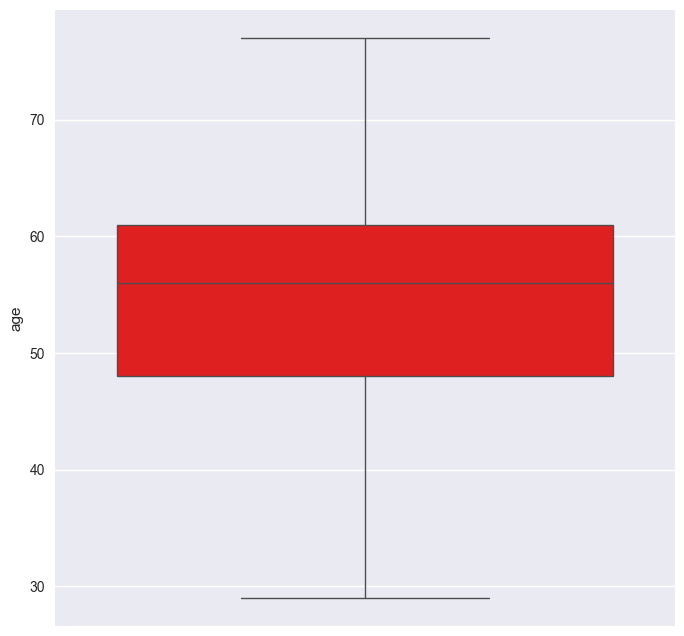

In [19]:

plt.figure(figsize = (8, 8))
sns.boxplot(data = data, y = 'age', color = 'red')


Assigning values from dataset

In [20]:

X = data.drop(['target'], axis = 1)
y = data['target']

In [21]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Dividing data using train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

Getting the shape

In [23]:
X_train.shape

(768, 13)

In [24]:
X_test.shape

(257, 13)

Creating Empty Lists

In [25]:
# Store results and ROC data
metrics = []
roc_data = {}

In [26]:
# Function to evaluate and store model performance
def evaluate_model(name, model, X_test, y_test, y_pred, y_pred_prob):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_prob)

    # Confusion matrix values (TP, TN, FP, FN)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    total = tn + fp + fn + tp

    print(f"\n{name} Confusion Matrix:")
    print(f"Total - {total} | Positive (1) - {tp + fn} | Negative (0) - {tn + fp}")
    print(f"Positive (1) - {tp} TP | {fn} FN")
    print(f"Negative (0) - {fp} FP | {tn} TN")

    metrics.append([name, accuracy, precision, recall, f1, auc, tp, tn, fp, fn])

    roc_curve_data = roc_curve(y_test, y_pred_prob)
    roc_data[name] = (roc_curve_data, auc)


In [27]:
# 1. Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
y_pred_prob_dt = dt.predict_proba(X_test)[:, 1]
evaluate_model('Decision Tree', dt, X_test, y_test, y_pred_dt, y_pred_prob_dt)


Decision Tree Confusion Matrix:
Total - 257 | Positive (1) - 125 | Negative (0) - 132
Positive (1) - 119 TP | 6 FN
Negative (0) - 0 FP | 132 TN


In [28]:
# 2. Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_pred_prob_rf = rf.predict_proba(X_test)[:, 1]
evaluate_model('Random Forest', rf, X_test, y_test, y_pred_rf, y_pred_prob_rf)


Random Forest Confusion Matrix:
Total - 257 | Positive (1) - 125 | Negative (0) - 132
Positive (1) - 125 TP | 0 FN
Negative (0) - 0 FP | 132 TN


In [29]:
# 3. Logistic Regression
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
y_pred_prob_lr = lr.predict_proba(X_test)[:, 1]
evaluate_model('Logistic Regression', lr, X_test, y_test, y_pred_lr, y_pred_prob_lr)


Logistic Regression Confusion Matrix:
Total - 257 | Positive (1) - 125 | Negative (0) - 132
Positive (1) - 108 TP | 17 FN
Negative (0) - 33 FP | 99 TN


C:\Users\prana\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [30]:
# 4. K-Nearest Neighbors Classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
y_pred_prob_knn = knn.predict_proba(X_test)[:, 1]
evaluate_model('K-Nearest Neighbors', knn, X_test, y_test, y_pred_knn, y_pred_prob_knn)


K-Nearest Neighbors Confusion Matrix:
Total - 257 | Positive (1) - 125 | Negative (0) - 132
Positive (1) - 89 TP | 36 FN
Negative (0) - 36 FP | 96 TN


In [31]:
# 5. Decision Tree with Grid Search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(3, 10),
    'min_samples_split': range(2, 10)
}
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_dt = grid_search.best_estimator_
y_pred_grid = best_dt.predict(X_test)
y_pred_prob_grid = best_dt.predict_proba(X_test)[:, 1]
evaluate_model('Decision Tree (Grid Search)', best_dt, X_test, y_test, y_pred_grid, y_pred_prob_grid)


Decision Tree (Grid Search) Confusion Matrix:
Total - 257 | Positive (1) - 125 | Negative (0) - 132
Positive (1) - 117 TP | 8 FN
Negative (0) - 0 FP | 132 TN


In [32]:
# Step 8: Create DataFrame for the results
metrics_df = pd.DataFrame(metrics, columns=['Algorithm', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC', 'TP', 'TN', 'FP', 'FN'])
print("\nPerformance Comparison Table (All Metrics with Confusion Matrix):")
print(metrics_df)


Performance Comparison Table (All Metrics with Confusion Matrix):
                     Algorithm  Accuracy  Precision  Recall  F1 Score  \
0                Decision Tree  0.976654   1.000000   0.952  0.975410   
1                Random Forest  1.000000   1.000000   1.000  1.000000   
2          Logistic Regression  0.805447   0.765957   0.864  0.812030   
3          K-Nearest Neighbors  0.719844   0.712000   0.712  0.712000   
4  Decision Tree (Grid Search)  0.968872   1.000000   0.936  0.966942   

        AUC   TP   TN  FP  FN  
0  0.976000  119  132   0   6  
1  1.000000  125  132   0   0  
2  0.882909  108   99  33  17  
3  0.840909   89   96  36  36  
4  0.975758  117  132   0   8  


In [33]:
# Step 9: Performance Vector (summary metrics of accuracy, precision, recall, F1, AUC)
metrics_df['Performance Vector'] = metrics_df[['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC']].apply(lambda x: np.mean(x), axis=1)

In [34]:
# Display Performance Vector
print("\nPerformance Vector (Average of all key metrics):")
print(metrics_df[['Algorithm', 'Performance Vector']])


Performance Vector (Average of all key metrics):
                     Algorithm  Performance Vector
0                Decision Tree            0.976013
1                Random Forest            1.000000
2          Logistic Regression            0.826069
3          K-Nearest Neighbors            0.739351
4  Decision Tree (Grid Search)            0.969514


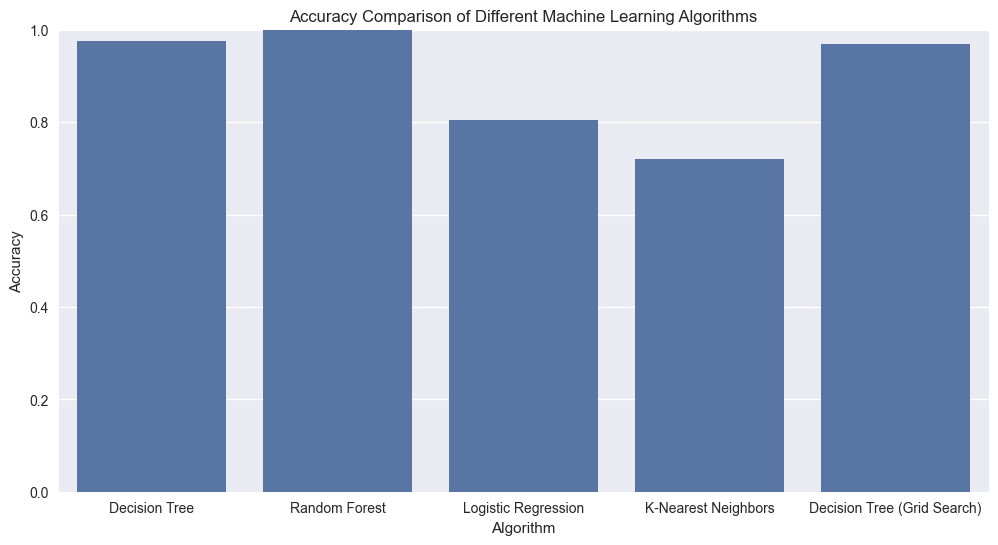

In [35]:
# Step 10: Plot comparison table using bar plot for Accuracy
plt.figure(figsize=(12, 6))
sns.barplot(x='Algorithm', y='Accuracy', data=metrics_df)
plt.title('Accuracy Comparison of Different Machine Learning Algorithms')
plt.ylabel('Accuracy')
plt.xlabel('Algorithm')
plt.ylim(0, 1)
plt.show()

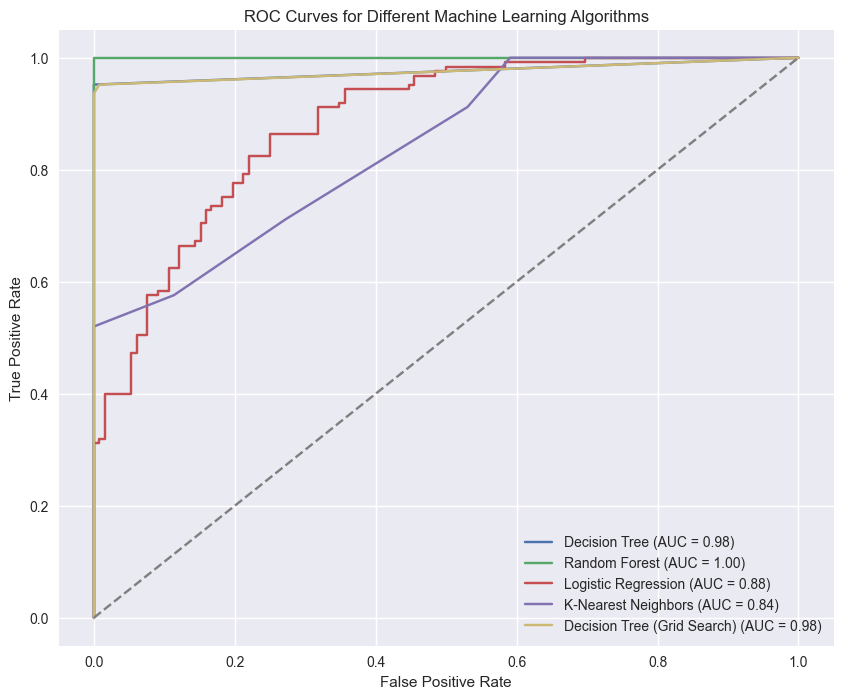

In [36]:
# Step 11: Plotting ROC curves for comparison
plt.figure(figsize=(10, 8))
for model, (roc_curve_data, auc_score) in roc_data.items():
    fpr, tpr, _ = roc_curve_data
    plt.plot(fpr, tpr, label=f'{model} (AUC = {auc_score:.2f})')

plt.plot([0, 1], [0, 1], color='grey', linestyle='--')  # Diagonal line
plt.title('ROC Curves for Different Machine Learning Algorithms')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [37]:
# Step 12: Feature Importance for Random Forest
importances = rf.feature_importances_  # Extract feature importances from the model
feature_names = data.drop(columns=['target']).columns  # Feature names excluding the target column
sorted_indices = np.argsort(importances)[::-1]  # Sorting the feature importance in descending order

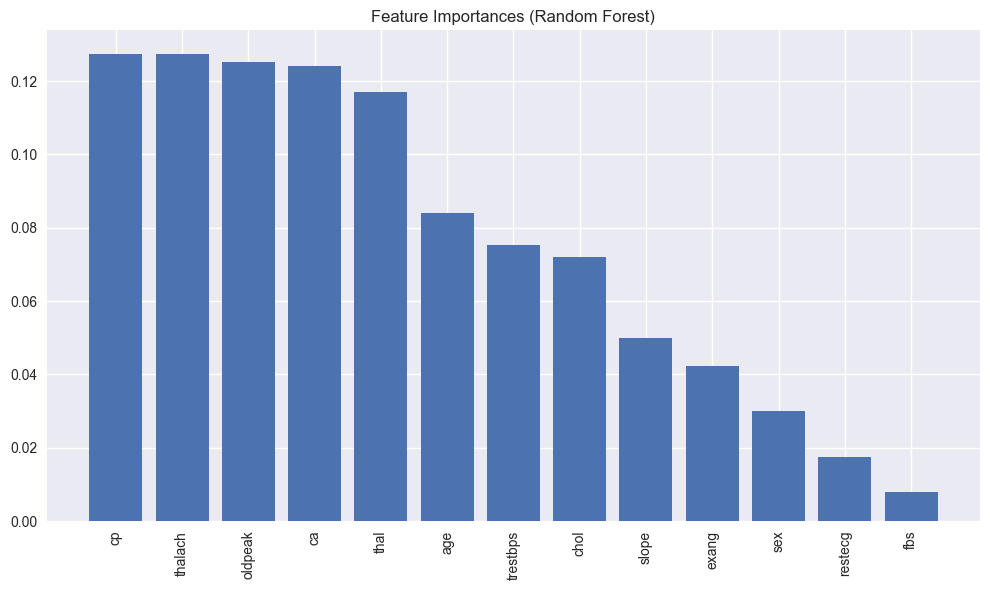

In [38]:
# Plotting the feature importance
plt.figure(figsize=(10, 6))
plt.title('Feature Importances (Random Forest)')
plt.bar(range(X.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X.shape[1]), feature_names[sorted_indices], rotation=90)  # Rotate feature names for readability
plt.tight_layout()
plt.show()

Feature Importance Table:
 Rank  Feature  Importance
    1       cp    0.127464
    2  thalach    0.127275
    3  oldpeak    0.125255
    4       ca    0.124029
    5     thal    0.116962
    6      age    0.084151
    7 trestbps    0.075219
    8     chol    0.072074
    9    slope    0.049870
   10    exang    0.042286
   11      sex    0.029983
   12  restecg    0.017515
   13      fbs    0.007916


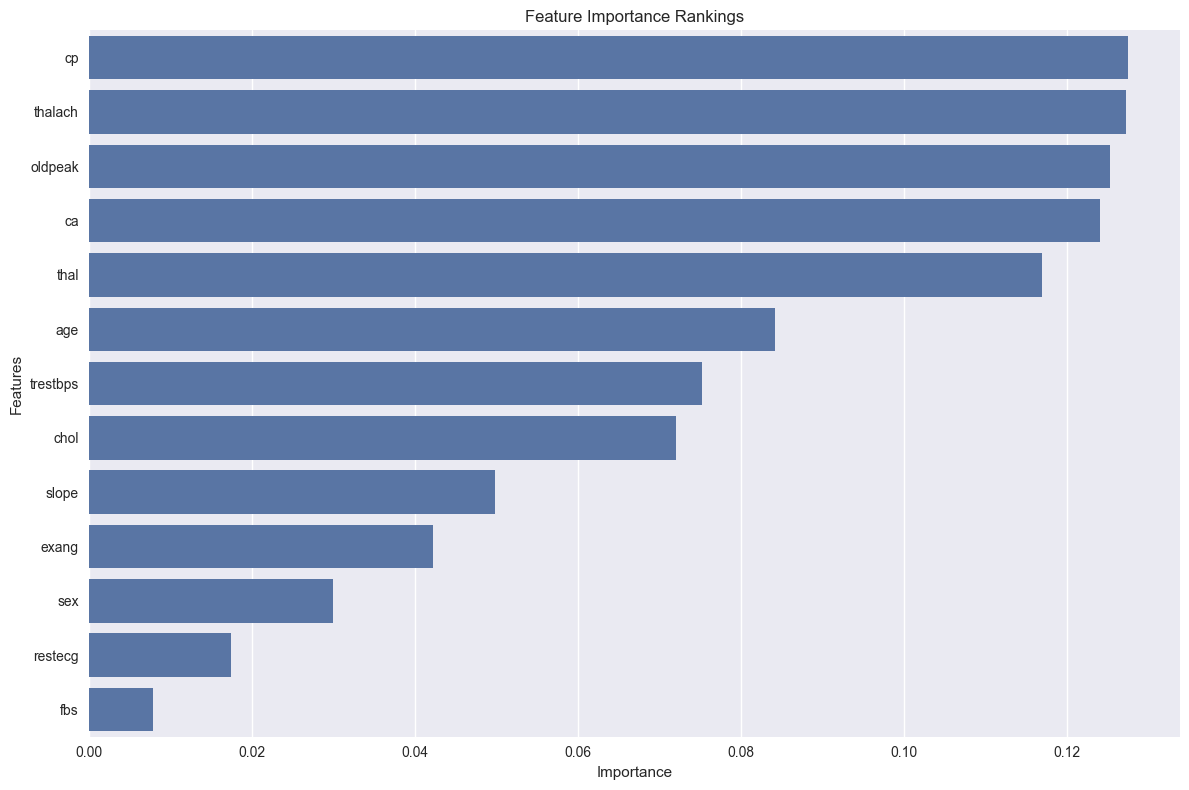

In [39]:
importances = rf.feature_importances_
feature_names = X.columns

# Create a dataframe of feature importances
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort the dataframe by importance in descending order
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False).reset_index(drop=True)

# Add a rank column
feature_importance_df['Rank'] = feature_importance_df.index + 1

# Reorder columns
feature_importance_df = feature_importance_df[['Rank', 'Feature', 'Importance']]

# Display the table
print("Feature Importance Table:")
print(feature_importance_df.to_string(index=False))

# Optionally, save to CSV
# feature_importance_df.to_csv('feature_importance.csv', index=False)

# Create a bar plot of feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance Rankings')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

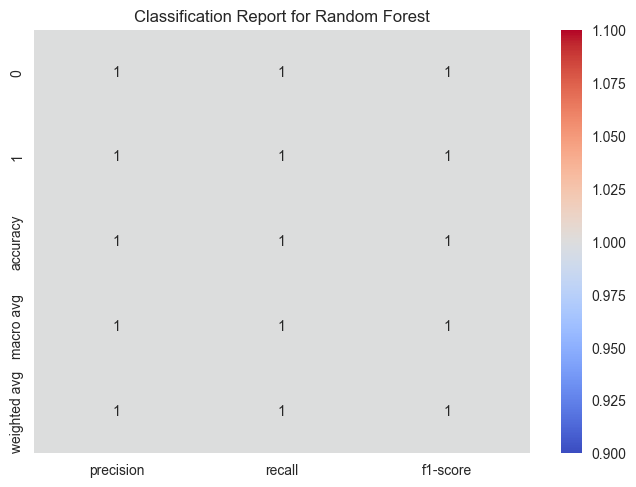

In [40]:

# Step 13: Classification Report Visualization (heatmap)
# Visualize the precision, recall, and F1-score for Random Forest
clf_report_rf = classification_report(y_test, y_pred_rf, output_dict=True)
sns.heatmap(pd.DataFrame(clf_report_rf).iloc[:-1, :].T, annot=True, cmap="coolwarm")
plt.title("Classification Report for Random Forest")
plt.show()

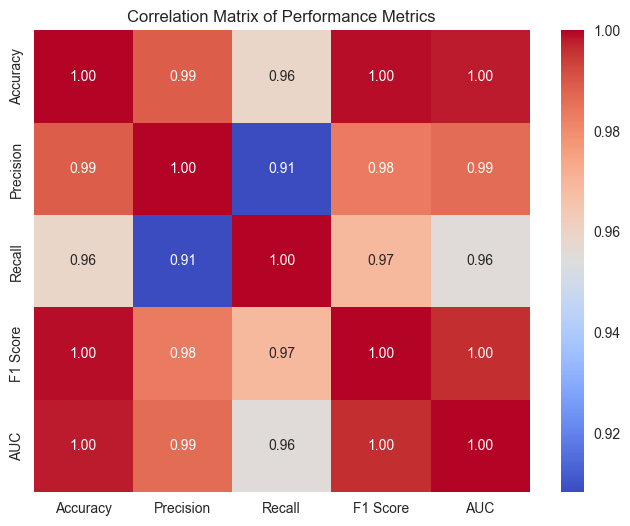

In [41]:
# Step 15: Correlation Matrix of Performance Metrics
metrics_correlation = metrics_df[['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(metrics_correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Performance Metrics')
plt.show()


Final Accuracy Comparison Table for All Algorithms:
                     Algorithm  Accuracy
0                Decision Tree  0.976654
1                Random Forest  1.000000
2          Logistic Regression  0.805447
3          K-Nearest Neighbors  0.719844
4  Decision Tree (Grid Search)  0.968872


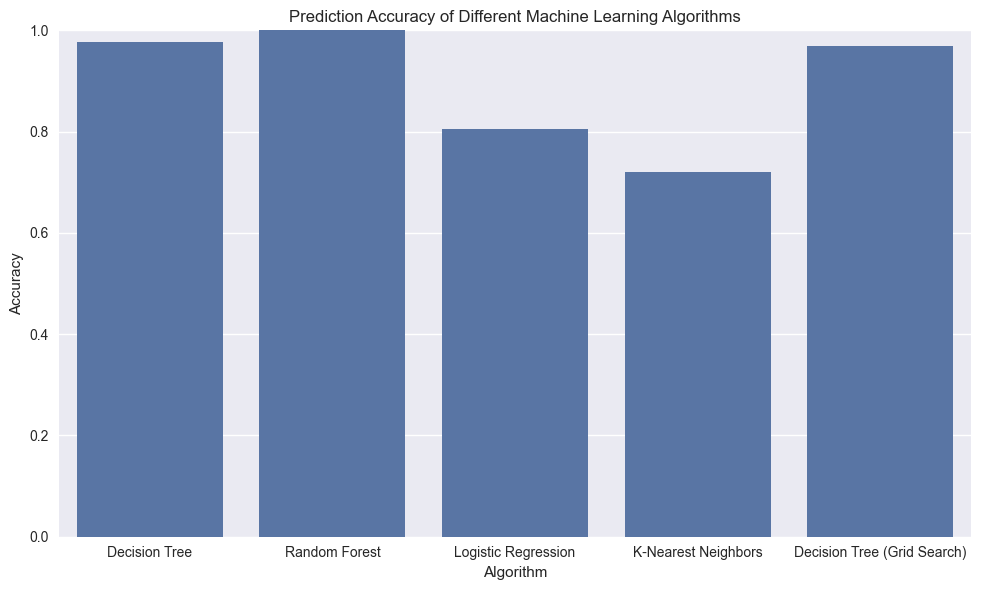

In [42]:
# Final Comparison Table for Prediction Accuracy of all Algorithms
print("\nFinal Accuracy Comparison Table for All Algorithms:")
accuracy_comparison = metrics_df[['Algorithm', 'Accuracy']]
print(accuracy_comparison)

# Plotting Accuracy Comparison for better visualization
plt.figure(figsize=(10, 6))
sns.barplot(x='Algorithm', y='Accuracy', data=accuracy_comparison)
plt.title('Prediction Accuracy of Different Machine Learning Algorithms')
plt.ylabel('Accuracy')
plt.xlabel('Algorithm')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

In [43]:
import pickle

## Step 17: Create DataFrame for the results
metrics_df = pd.DataFrame(metrics, columns=['Algorithm', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC', 'TP', 'TN', 'FP', 'FN'])
print("\nPerformance Comparison Table (All Metrics with Confusion Matrix):")
print(metrics_df)


Performance Comparison Table (All Metrics with Confusion Matrix):
                     Algorithm  Accuracy  Precision  Recall  F1 Score  \
0                Decision Tree  0.976654   1.000000   0.952  0.975410   
1                Random Forest  1.000000   1.000000   1.000  1.000000   
2          Logistic Regression  0.805447   0.765957   0.864  0.812030   
3          K-Nearest Neighbors  0.719844   0.712000   0.712  0.712000   
4  Decision Tree (Grid Search)  0.968872   1.000000   0.936  0.966942   

        AUC   TP   TN  FP  FN  
0  0.976000  119  132   0   6  
1  1.000000  125  132   0   0  
2  0.882909  108   99  33  17  
3  0.840909   89   96  36  36  
4  0.975758  117  132   0   8  


In [44]:
# Step 18: Performance Vector (summary metrics of accuracy, precision, recall, F1, AUC)
metrics_df['Performance Vector'] = metrics_df[['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC']].apply(lambda x: np.mean(x), axis=1)


In [45]:
# Display Performance Vector
print("\nPerformance Vector (Average of all key metrics):")
print(metrics_df[['Algorithm', 'Performance Vector']])


Performance Vector (Average of all key metrics):
                     Algorithm  Performance Vector
0                Decision Tree            0.976013
1                Random Forest            1.000000
2          Logistic Regression            0.826069
3          K-Nearest Neighbors            0.739351
4  Decision Tree (Grid Search)            0.969514


In [46]:
# Step 19: Automatically select the model with the highest accuracy
best_model_name = metrics_df.loc[metrics_df['Accuracy'].idxmax(), 'Algorithm']
print(f"\nBest Model Based on Accuracy: {best_model_name}")


Best Model Based on Accuracy: Random Forest


In [47]:

# Select the corresponding trained model based on the name
if best_model_name == 'Decision Tree':
    best_model = dt
elif best_model_name == 'Random Forest':
    best_model = rf
elif best_model_name == 'Logistic Regression':
    best_model = lr
elif best_model_name == 'K-Nearest Neighbors':
    best_model = knn
elif best_model_name == 'Decision Tree (Grid Search)':
    best_model = best_dt

In [48]:
# Save the best model into a pickle file
with open('best_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

print("Best model saved as 'best_model.pkl' for deployment.")

Best model saved as 'best_model.pkl' for deployment.


In [49]:
predictions = best_model.predict(X_test)

In [50]:
predicted_classes = (predictions > 0.5).astype(int)

In [51]:
results_df = pd.DataFrame({
    'Actual': y_test,               # True labels
    'Predicted': predicted_classes.flatten()  # Predicted labels
})

In [52]:
print("Predictions Results:")
display(results_df)

Predictions Results:


,Actual,Predicted
527,1,1
359,1,1
447,0,0
31,1,1
621,0,0
...,...,...
940,0,0
787,0,0
926,0,0
249,1,1


In [53]:
results_df.head()

,Actual,Predicted
527,1,1
359,1,1
447,0,0
31,1,1
621,0,0


In [54]:
results_df.tail()

,Actual,Predicted
940,0,0
787,0,0
926,0,0
249,1,1
552,0,0


In [55]:
cm = confusion_matrix(y_test, predicted_classes)
cm_df = pd.DataFrame(cm, index=['Actual Negative', 'Actual Positive'], 
                     columns=['Predicted Negative', 'Predicted Positive'])

In [56]:
cm_df

,Predicted Negative,Predicted Positive
Actual Negative,132,0
Actual Positive,0,125


In [57]:
model = RandomForestClassifier()

# Define hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

In [58]:
# Set up Grid Search with cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
                           cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

In [59]:
# Fit the model
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy', verbose=2)

In [60]:
# Best parameters from Grid Search
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}


In [61]:
# Evaluate the model with cross-validation
cv_scores = cross_val_score(grid_search.best_estimator_, X_train, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

Cross-Validation Scores: [1.         0.96103896 1.         0.97385621 0.94117647]
Mean CV Score: 0.9752143281555046


In [62]:
# Make predictions on the test set
y_pred = grid_search.predict(X_test)

In [65]:
# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[132   0]
 [  3 122]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       132
           1       1.00      0.98      0.99       125

    accuracy                           0.99       257
   macro avg       0.99      0.99      0.99       257
weighted avg       0.99      0.99      0.99       257

